Text(0.5, 1.0, 'Filtered ECG [frequency domain]')

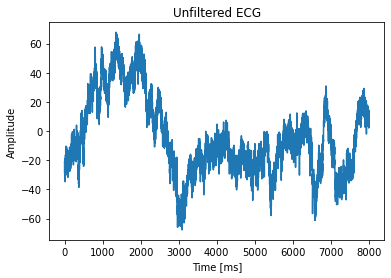

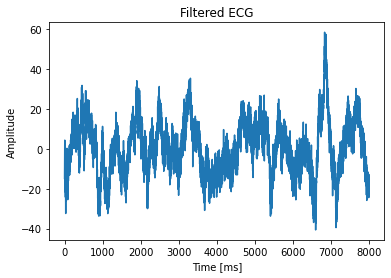

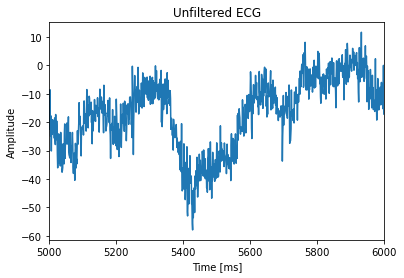

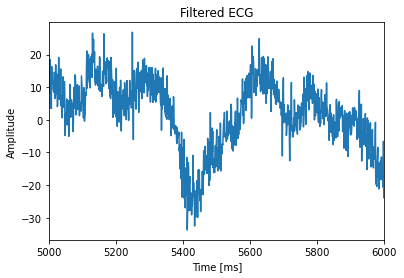

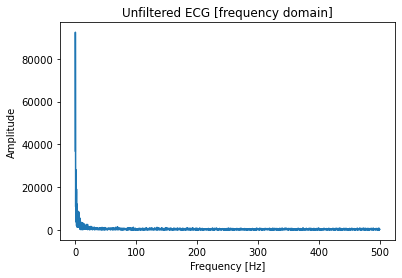

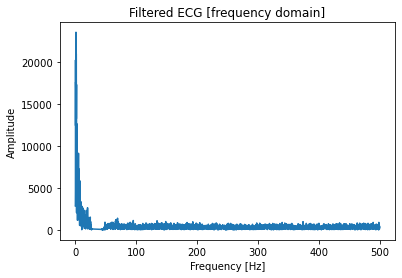

In [20]:

import matplotlib.pyplot as plt
import numpy as np
from IIR2Filter import IIR2Filter

#----------Importing and preparing the signal before filtering-----------
data = np.loadtxt('resting.dat')
ampGain = 1;
fs = 1000;

ecg = data[:,1]
x = data[:,0]

# reducing the signal to remove amplifier gain 
ecg = ecg/ampGain #ecg amplitude in mVs
rangeEcg = max(ecg)-min(ecg)
ecg = ecg-(min(ecg)+rangeEcg/2)

ecg = ecg[0:8000]
x = x[0:8000]

#---------------------------------Filtering-----------------------------

# Frequencies are given as Hz, hence they need to be normalised (fs required)
FilterMains = IIR2Filter(5,[25,49],'bandstop',design='cheby1',rp=1,fs=fs)
# Creates a 10th order highpass Butterworth filter with normalised cutoff 
# frequency 0.002 (=1 Hz with a 1000 Hz sampling frequency).
FilterDC = IIR2Filter(4,0.001,'highpass')

ecgFiltered = np.zeros(len(ecg))

for i in range(len(ecg)):
    ecgFiltered[i] = FilterMains.filter(ecg[i])
    ecgFiltered[i] = FilterDC.filter(ecgFiltered[i])
        
#-------------------------------Plotting---------------------------------    

plt.figure(1)
plt.plot(x,ecg)
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("Unfiltered ECG")

plt.figure(2)
plt.plot(x,ecgFiltered)
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("Filtered ECG")

plt.figure(3)
plt.plot(x[5000:6000],ecg[5000:6000])
plt.xlim([5000,6000])
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("Unfiltered ECG")

plt.figure(4)
plt.plot(x[5000:6000],ecgFiltered[5000:6000])
plt.xlim([5000,6000])
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
plt.title("Filtered ECG")

freq = np.fft.fft(ecg)
freq = abs(freq[0:int(len(freq)/2)])
xfF = np.linspace(0,fs/2,len(freq))
plt.figure(5)
plt.plot(xfF,np.real(freq))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("Unfiltered ECG [frequency domain]")

freq = np.fft.fft(ecgFiltered)
freq = abs(freq[0:int(len(freq)/2)])
xfF = np.linspace(0,fs/2,len(freq))
plt.figure(6)
plt.plot(xfF,np.real(freq))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("Filtered ECG [frequency domain]")

